# ETL Project
## Members:
* Francisco Estevez
* Alvin Kim
### Data Sources
We extracted data from the Machine Learning Course offered by Google
https://developers.google.com/machine-learning/crash-course/
The dataset we selected is part of the Data preparation of the course
#### Collecting Data > The Size and Quality of a Data Set
The data source contains 20 Millions of records:
    * Movies from 1891 to 2015
    * Rates
    * Genome Scores
#### Final database
Our information is stored in Mongo DB:
    * Movie Rates
    * Movie Genome Scores

### Notebook 2: Extract, and transform Movie ratings

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Store CSV into DataFrame

In [2]:
csv_file = "Resources/ratings.csv"
ratings_df = pd.read_csv(csv_file)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


#### The source file includes 20 MILLION of records with ratings for movies

In [4]:
ratings_df.count()

userId       20000263
movieId      20000263
rating       20000263
timestamp    20000263
dtype: int64

### Review RATING column and values

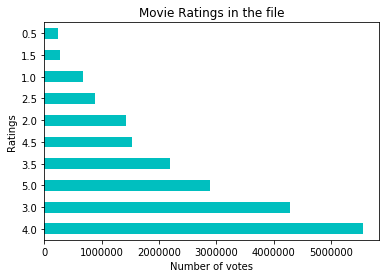

In [5]:
plt.ylabel('Ratings')
plt.xlabel('Number of votes')
plt.title('Movie Ratings in the file')
ratings_df.rating.value_counts().plot(kind='barh', color='c');

#### Group records by movie ID and perform statistics of the RATINGS by movie
* The grouped dataset is reduced from 20 Million of records to 27K for analysis

In [6]:
ratings_df = ratings_df.groupby('movieId')['rating'].describe()

In [7]:
len(ratings_df)

26744

In [8]:
ratings_df.head()

,count,mean,std,min,25%,50%,75%,max
movieId,,,,,,,,
1,49695.0,3.921240,0.889012,0.5,3.5,4.0,4.5,5.0
2,22243.0,3.211977,0.951150,0.5,3.0,3.0,4.0,5.0
3,12735.0,3.151040,1.006642,0.5,3.0,3.0,4.0,5.0
4,2756.0,2.861393,1.095702,0.5,2.0,3.0,4.0,5.0
5,12161.0,3.064592,0.982140,0.5,3.0,3.0,4.0,5.0


### Save TRANSFORMED dataset as CSV file

In [11]:
ratings_df.to_csv(f"Resources/transformed_ratings_data.csv", index=True)